C:\Users\tenshi\AppData\Local\Temp\ipykernel_18088\1772121386.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tour_name', y='duration', data=int_matches_df, palette='pastel')


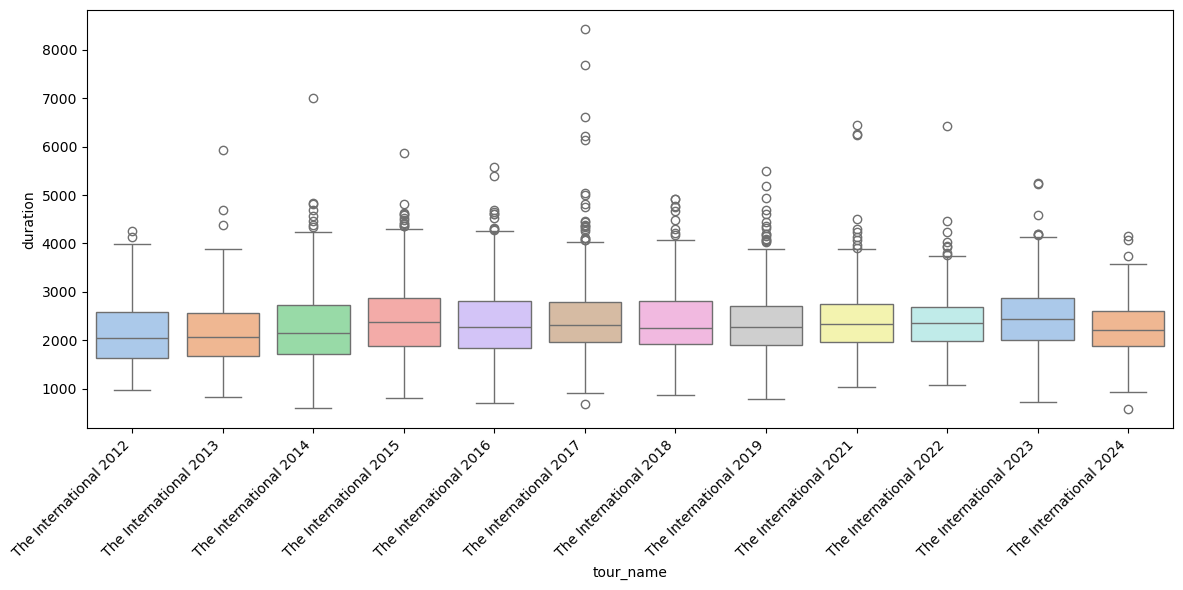

In [1]:
import requests

URL = 'https://api.opendota.com/api/leagues'
params = {}

leagues = requests.get(URL, params=params)

leagues.content

leagues_dict = leagues.json()

import re
pattern = r'The International \d{4}$'

# int means International - name of the main dota 2 tournament
int_leagues_ids = {item['leagueid'] : item['name'] for item in leagues_dict if re.match(pattern, item['name'])}
sort_tourn_items = sorted(int_leagues_ids.items(), key=lambda x:x[1])

int_matches_data = {}
for leag_id, _ in sort_tourn_items:
    int_matches_data[leag_id] = requests.get(f'https://api.opendota.com/api/leagues/{leag_id}/matches').json()

int_matches_list = [list(item.values()) for leag in int_matches_data.values() for item in leag]
columns = tuple(int_matches_data.popitem()[1][0].keys())

import pandas as pd

int_matches_df = pd.DataFrame(int_matches_list, columns=columns)
int_matches_df['tour_name'] = int_matches_df['leagueid'].map(int_leagues_ids)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='tour_name', y='duration', data=int_matches_df, palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Проанализируем график и соотнесем его изменения с выходом крупных обновлений в Dota 2.

### Период 2014-2015
В этот период мы можем наблюдать резкое увелечение медианы длительности игры и смещение ящика вверх. Связано это с тем, что в период с 2014 по 2015 вышло несколько крупных обновлений, которые добавили в игру Bounty Runes, новые предметы, изменили ландшафт, пермещение по карте, баланс героев, и систему выкупа после смерти.
### Период 2015-2022
На графике мы можем наблюдать, как ящик начинает сужаться, но медиана остается примерно на одном уровне. Из этого мы можем сделать вывод, что крупные обновления делали длительность игр стабильнее. В декабре 2016 года в игру добавили Древо талантов героев, которое вносило в игру больше тактической составляющей, что отразилось на графике сильным изменением высоты ящика. В 2019 году были введены нейтральные предметы, которые заставили игроков следить за своим лесом. Это также отобразилось в виде уменьшения высоты ящика. Эти изменения увеличивали тактическую составляющую, что позволяло игрокам заранее выстраивать ход игры, что приводило к уменьшению разброса в длительности игр.
### Период 2022-2024
В 2023 году был выпущен очень крупный патч, который сильно изменил ландшафт на карте и добавил множество новых мест и механик. Из-за такого большого обновления мы можем наблюдать рост высоты ящика, ведь игроки не успели привыкнуть к столько крупным изменениям. В 2024 году крупных изменений не было, поэтому игроки адаптировались к новой карте. Это отразилось на стабильности длительности игр, которую мы можем проследить в виде уменьшения высоты ящика. Также медиана довольно сильно просела ввиду увелечения темпа игр с введением новых механик.